In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [6]:
df= pd.read_csv("homeless_impact (2).csv")

In [7]:
df

,county,date,rooms,rooms_occupied,trailers_requested,trailers_delivered,donated_trailers_delivered
0,county,4/14/2020,403,115,91,85,0
1,county,4/14/2020,0,0,0,0,0
2,county,4/14/2020,0,0,0,0,0
3,county,4/14/2020,65,65,0,0,0
4,county,4/14/2020,0,0,0,0,0
...,...,...,...,...,...,...,...
8908,Ventura County,10/23/2020,341,144,0,0,0
8909,Yolo County,10/23/2020,157,148,0,0,0
8910,Yuba County,10/23/2020,0,0,0,0,0
8911,Wilton Rancheria Tribe,10/23/2020,0,0,0,0,0


In [8]:
df.columns

Index(['county', 'date', 'rooms', 'rooms_occupied', 'trailers_requested',
       'trailers_delivered', 'donated_trailers_delivered'],
      dtype='object')

In [9]:
df.corr()


,rooms,rooms_occupied,trailers_requested,trailers_delivered,donated_trailers_delivered
rooms,1.000000,0.946631,0.867980,0.878718,-0.012713
rooms_occupied,0.946631,1.000000,0.869433,0.879181,0.006150
trailers_requested,0.867980,0.869433,1.000000,0.982262,-0.002645
trailers_delivered,0.878718,0.879181,0.982262,1.000000,-0.038310
donated_trailers_delivered,-0.012713,0.006150,-0.002645,-0.038310,1.000000


In [138]:
df.tail(20)

,county,date,rooms,rooms_occupied,trailers_requested,trailers_delivered
8893,San Mateo County,10/23/2020,167,167,0,0
8894,Santa Barbara County,10/23/2020,95,56,0,0
8895,Santa Clara County,10/23/2020,837,559,105,12
8896,Santa Cruz County,10/23/2020,256,157,35,0
8897,Shasta County,10/23/2020,93,90,0,0
8898,Sierra County,10/23/2020,0,0,0,0
8899,Siskiyou County,10/23/2020,0,0,0,0
8900,Solano County,10/23/2020,126,110,0,0
8901,Sonoma County,10/23/2020,94,78,24,24
8902,Stanislaus County,10/23/2020,122,66,0,0


In [ ]:
df.drop('donated_trailers_delivered',inplace=True,axis=1)

In [99]:
x_train=df[['rooms']]

In [101]:
x_train=x_train.reshape(-1,1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [83]:
y=df[['trailers_requested']]

In [107]:
y.reshape(1,-1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [53]:
y

,rooms
1,0
2,0
3,65
4,0
5,0
...,...
8908,341
8909,157
8910,0
8911,0


In [43]:
y

1         0
2         0
3        65
4         0
5         0
       ... 
8908    144
8909    148
8910      0
8911      0
8912      0
Name: rooms_occupied, Length: 8910, dtype: int64

# linera regression

In [151]:
lr= LinearRegression()

In [157]:
lr.fit(df[['rooms']],df[['trailers_requested']])

LinearRegression()

In [158]:
lr.coef_

array([[0.11503328]])

In [159]:
lr.intercept_

array([-4.01407112])

In [167]:
y=df[['trailers_requested']]

In [166]:
x=df[['rooms']]

In [168]:
lr.score(x,y)

0.7534285133631927

In [160]:
lr.predict((np.array([256]).reshape(1,-1)))

array([[25.43444979]])

In [165]:
(0.11503328*167)+(-4.01407112)

15.19648664

# Linear regression using statsmodels

In [73]:
x=sm.add_constant(x)
model=sm.OLS(y,x)

In [74]:
result=model.fit()

In [75]:
result.params

const   -4.014071
rooms    0.115033
dtype: float64

In [76]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     trailers_requested   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                 2.722e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:19:36   Log-Likelihood:                -46142.
No. Observations:                8910   AIC:                         9.229e+04
Df Residuals:                    8908   BIC:                         9.230e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0141      0.488     -8.223      0.0

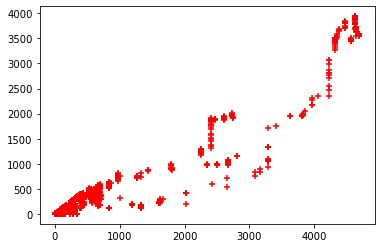

In [170]:
%matplotlib inline
plt.xlabel='rooms_occupied'
plt.ylabel='trailers_requested'
plt.scatter(df.rooms,df.rooms_occupied,marker="+",color='red')

In [118]:
x.corr()

,rooms
rooms,1.0


In [80]:
df.corr()

,rooms,rooms_occupied,trailers_requested,trailers_delivered
rooms,1.000000,0.946636,0.868003,0.878727
rooms_occupied,0.946636,1.000000,0.869481,0.879217
trailers_requested,0.868003,0.869481,1.000000,0.982272
trailers_delivered,0.878727,0.879217,0.982272,1.000000


In [88]:
lr.predict(250)

ValueError: Expected 2D array, got scalar array instead:
array=250.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.